<font style="font-size:96px; font-weight:bolder; color:#0040a0"><img src="http://montage.ipac.caltech.edu/docs/M51_logo.png" alt="M" style="float: left; padding: 25px 30px 25px 0px;" /></font>

<i><b>Montage</b> Montage is an astronomical image toolkit with components for reprojection, background matching, coaddition and visualization of FITS files. It can be used as a set of command-line tools (Linux, OS X and Windows), C library calls (Linux and OS X) and as Python binary extension modules.

The Montage source is written in ANSI-C and code can be downloaded from GitHub ( https://github.com/Caltech-IPAC/Montage ). The Python package can be installed from PyPI ("</i>pip install MontagePy<i>"). The package has no external dependencies. See http://montage.ipac.caltech.edu/ for details on the design and applications of Montage.


# MontagePy.main modules: mCoverageCheck

The Montage modules are generally used as steps in a workflow to create a mosaic of a set of input images.  These steps are: determine the geometry of the mosaic on the sky, reproject the images to a common frame and spatial sampling; rectify the backgrounds to a common level, and coadd the images into a mosaic.  This page illustrates the use of one Montage module, mCoverageCheck, which is used to check the overlap between a set of images and a region of interest.

Visit <a href="Mosaic.ipynb">Building a Mosaic with Montage</a> to see how mCoverageCheck is used as part of a workflow to creage a mosaic (or the <a href="Mosaic_oneshot.ipynb"> one shot </a> version if you just want to see the commands).  See the complete list of Montage Notebooks <a href="http://montage.ipac.caltech.edu/MontageNotebooks">here</a>.


In [1]:
from MontagePy.main import mCoverageCheck, mViewer

help(mCoverageCheck)

Help on built-in function mCoverageCheck in module MontagePy.main:

mCoverageCheck(...)
    mCoverageCheck finds the subset of an image list that overlaps a region of interest.
    
    Parameters
    ----------
    infile : str
        Table of image metadata.
    outfile : str
        Output table of matching records.
    mode : int, optional
        There are six 'modes' of use, depending on the region to be checked is defined: 0 (POINTS), a set of convex polygon vertices; 1 (BOX), box center and sizes; 2 (CIRCLE), center and radius of a cone on the sky; 3 (POINT), a single point on the sky; 4 (HEADER), a FITS header template (file); and 5 (CUTOUT), like box but uses the full image file WCS and updates the record to indicate what subset of each image overlaps the box.
    hdrfile : str, optional
        FITS header template file; only used by mode 4 (HEADER) above.
    narray : int, optional
        Size of the 'array' of real numbers to use.
    array : np.ndarray, optional
       

&nbsp;<p/>

## mCoverageCheck Example

The M17 dataset we are using has 48 images.We would like know which of them overlap a 0.20 degree radius circle centered on M17 itself.

In [2]:
rtn = mCoverageCheck('M17/rimages.tbl', 
                     'work/M17/subset.tbl',
                     narray=3, array = [275.19629, -16.17153, 0.2], 
                     mode=2)
print(rtn)

{'status': '0', 'count': 8}


&nbsp;<p/>

Here is a mosaic of the full dataset with the images identified above as overlapping with a 0.3 degree circle centered on M17 outlined:

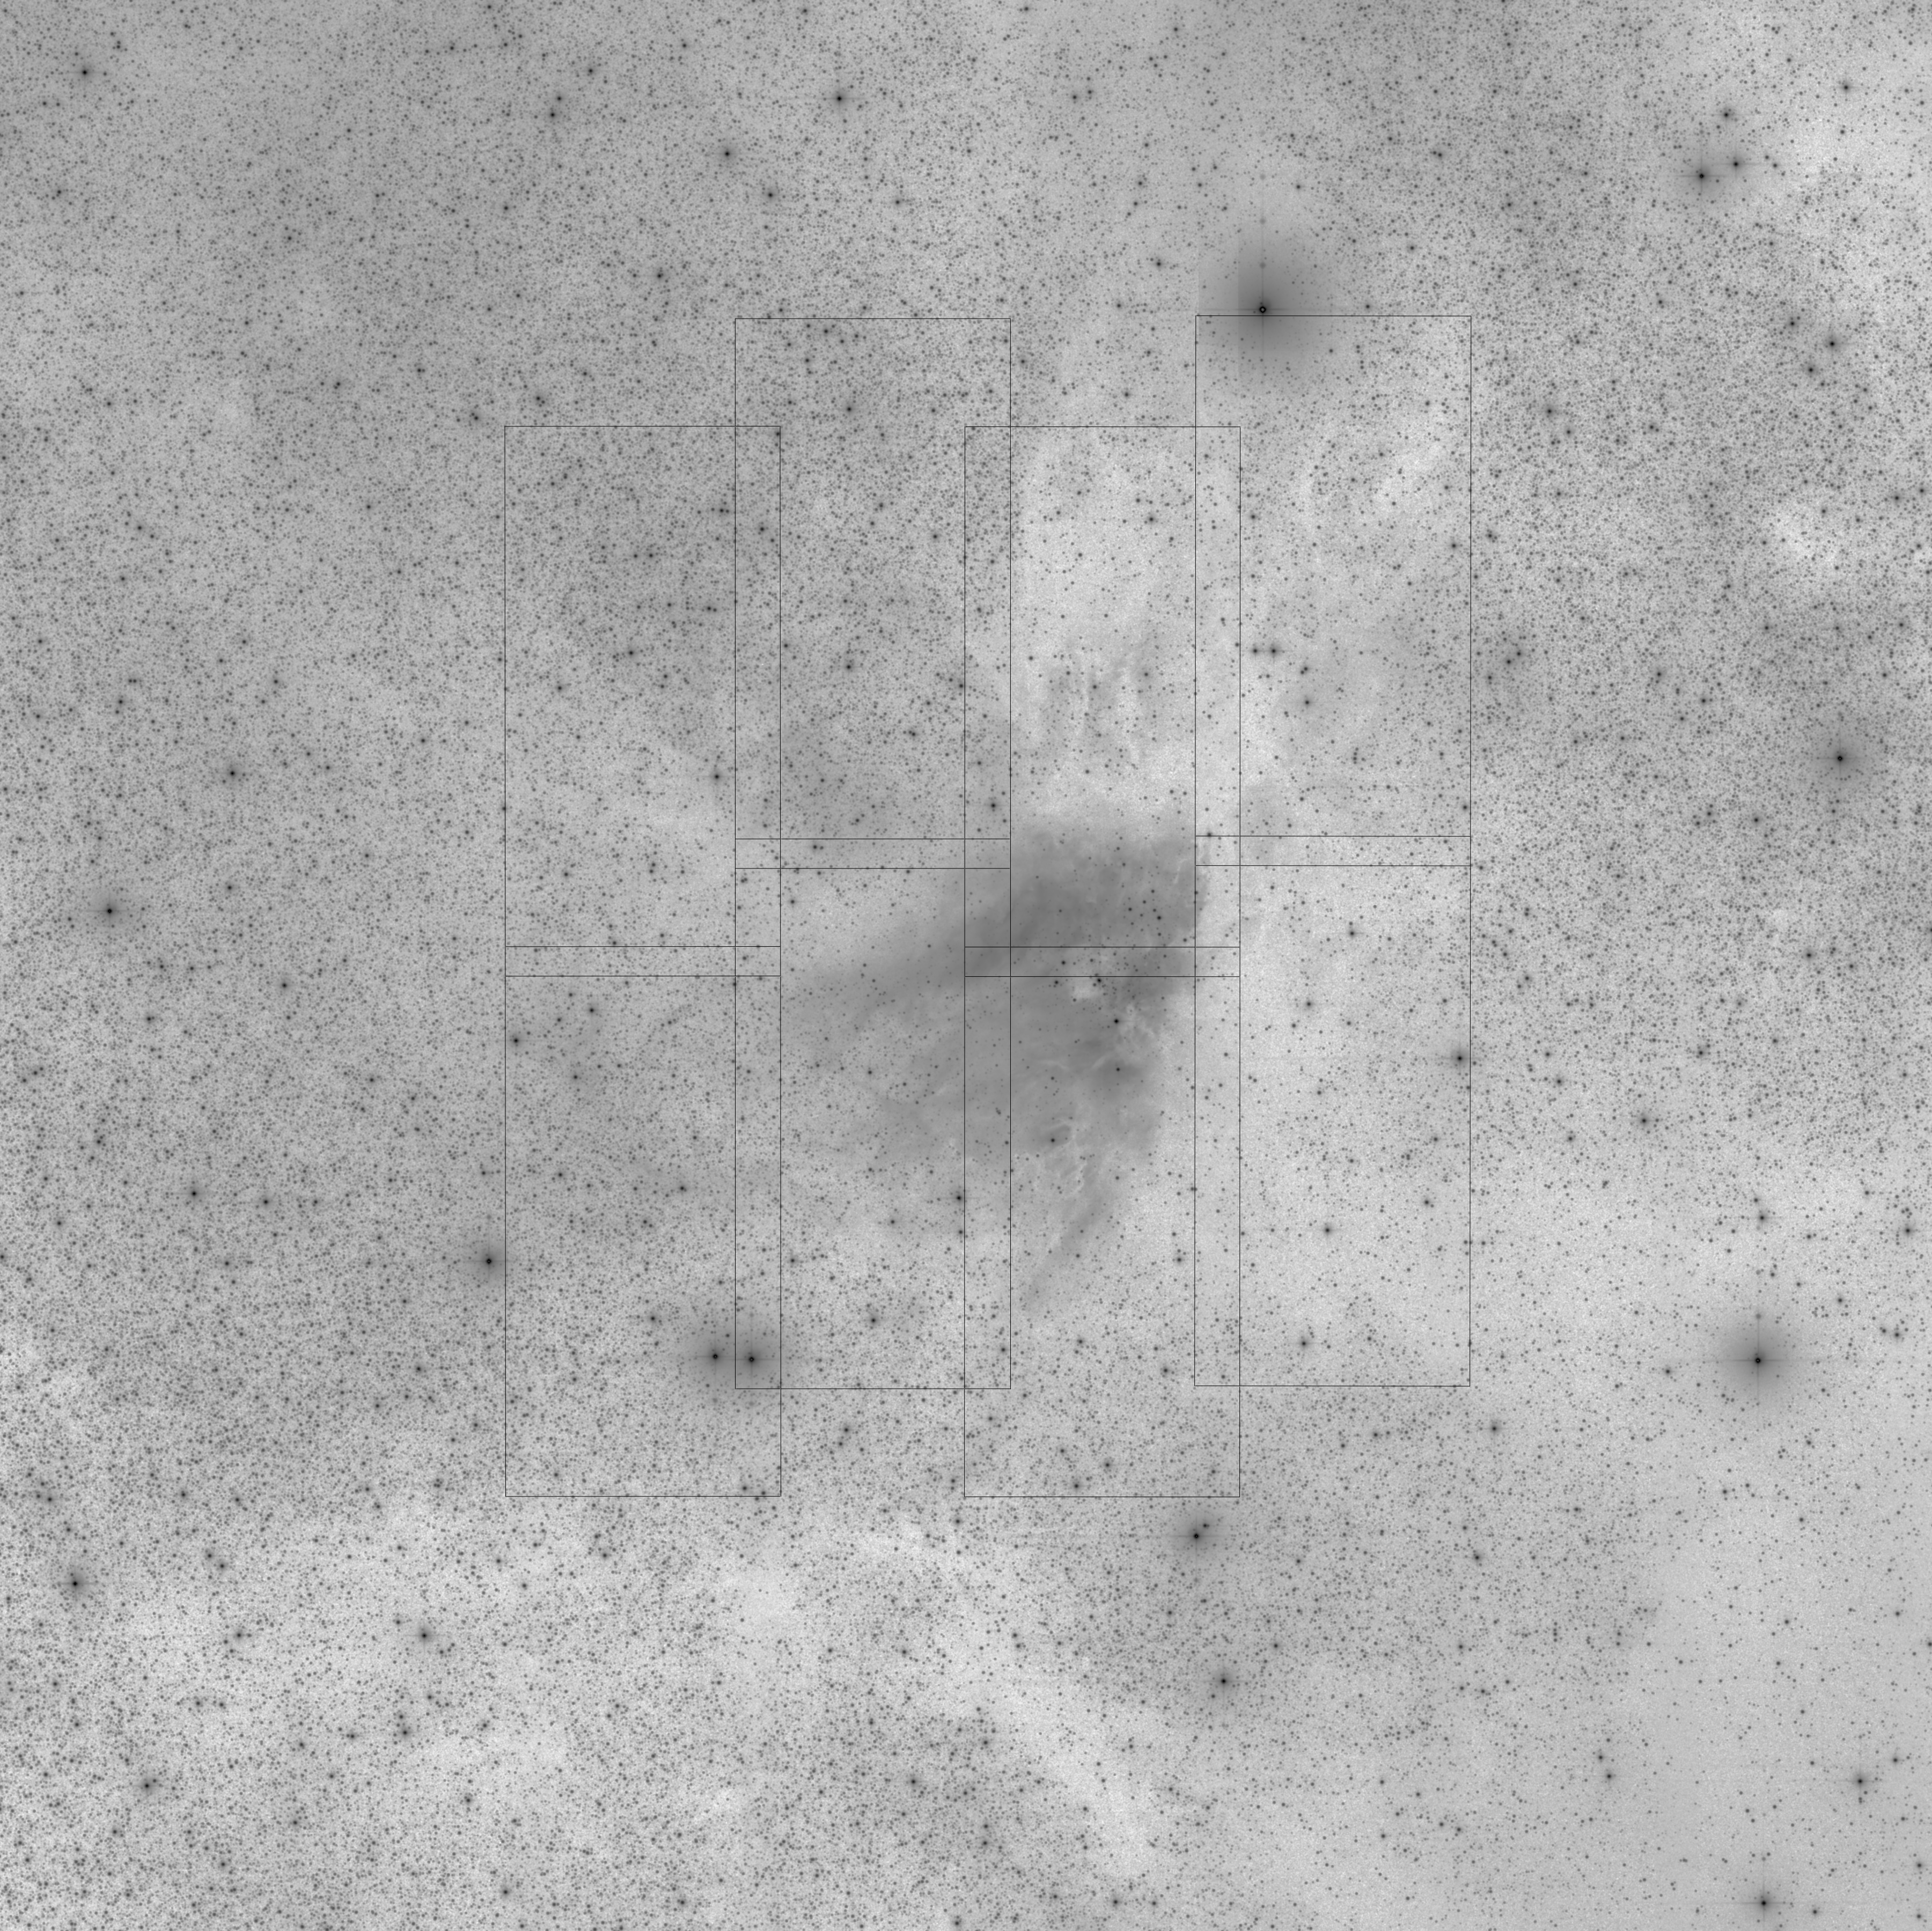

In [3]:
from IPython.display import Image

rtn = mViewer('-color black -imginfo work/M17/subset.tbl \
               -ct 1 -gray M17/mosaic.fits -2s max gaussian-log \
              -out work/M17/coverage.png', '', mode=2)

Image(filename='work/M17/coverage.png')

Montage functions return JSON structures.  They always include a status (0: success; 1: error) and a variable number of informational parameters.


## Error Handling

If mCoverageCheck encounters an error, the return structure will just have two elements: a status of 1 ("error") and a message string that tries to diagnose the reason for the error.

For instance, if the user specifies a table that doesn't exist:

In [4]:
rtn = mCoverageCheck('M17/unknown.tbl', 
                     'work/M17/subset.tbl',
                     narray=3, array = [275.19629, -16.17153, 0.2], 
                     mode=2)
print(rtn)

{'status': '1', 'msg': b'[struct stat="ERROR", msg="Usage: Input table file (M17/unknown.tbl) does not exist'}


&nbsp;

## Classic Montage: mCoverageCheck as a Stand-Alone Program

### mCoverageCheck Unix/Windows Command-line Arguments

<p>mCoverageCheck can also be run as a command-line tool in Linux, OS X, and Windows:</p>

<p><tt>
<b>Usage:</b> mCoverageCheck [-s statusfile] in.tbl out.tbl -<mode> <parameters> [where mode can be 'points', 'box', 'circle', 'header', 'point' or 'cutout'
</tt></p>
<p>&nbsp;</p>
<p>If you are writing in C/C++, mCoverageCheck can be accessed as a library function:</p>


<pre>
/*-***********************************************************************/
/*                                                                       */
/*  mCoverageCheck                                                       */
/*                                                                       */
/*  Montage is a set of general reprojection / coordinate-transform /    */
/*  mosaicking programs.  Any number of input images can be merged into  */
/*  an output FITS file.  The attributes of the input are read from the  */
/*  input files; the attributes of the output are read a combination of  */
/*  the command line and a FITS header template file.                    */
/*                                                                       */
/*  This module, mCoverageCheck, can be used to subset an image          */
/*  metadata table (containing FITS/WCS information or image corners)    */
/*  by determining which records in the table represent images that      */
/*  overlap with a region definition (box or circle on the sky) given    */
/*  on the command line.                                                 */
/*                                                                       */
/*   char  *path           Path to image files (table contains relative  */
/*                         paths)                                        */
/*   char  *infile         Table of image metadata                       */
/*   char  *outfile        Output table of matching records              */
/*                                                                       */
/*   int    mode           There are six 'modes' of use, depending on    */
/*                         the region to be checked is defined:          */
/*                         0 (POINTS), a set of convex polygon vertices; */
/*                         1 (BOX), box center and sizes; 2 (CIRCLE),    */
/*                         center and radius of a cone on the sky;       */
/*                         3 (POINT), a single point on the sky;         */
/*                         4 (HEADER), a FITS header template (file);    */
/*                         and 5 (CUTOUT),and 5 (CUTOUT), like box but   */
/*                         uses the full image file WCS and updates the  */
/*                         record to indicate what subset of each image  */
/*                         overlaps the box.                             */
/*                                                                       */
/*   char  *hdrfile        FITS header template file; only used by mode  */
/*                         4 (HEADER) above.                             */
/*                                                                       */
/*   int    narray         Size of the 'array' of real numbers to use.   */
/*   double array[]        Array of real numbers.  The size and use      */
/*                         depend on mode.  For instance for mode        */
/*                         0 (POINTS) the number is twice the number     */
/*                         of vertices in the polygon.                   */
/*                                                                       */
/*   int    debug          Debugging output level                        */
/*                                                                       */
/*************************************************************************/

struct mCoverageCheckReturn *mCoverageCheck(char *path, char *infile, char *outfile, int modein, char *hdrfile, int narray, double *array, int debug)
</pre>
<p><b>Return Structure</b></p>
<pre>
struct mCoverageCheckReturn
{
   int    status;        // Return status (0: OK, 1:ERROR)
   char   msg [1024];    // Return message (for error return)
   char   json[4096];    // Return parameters as JSON string
   int    count;         // Number of images matching region
};
</pre>